## Data Mining Assignment

### Analysing of Air quality with Linear Regression and Decision Tree

#### Student NO: 23081013
#### Group NO:49
#### Github Link: https://github.com/Viraj97-SL/Data-Mining-Analysis-of-Air-quality-with-Linear-Regression-and-Decision-Tree.git


Importing Libraries

In [36]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



### 1. Data Preprocessing

In [2]:
#Read the data file
df = pd.read_excel ("C:/Users/amant/OneDrive/Desktop/UH MSc In DS/Data Mining/Assignment2/AirQualityUCI.xlsx")
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550000,0.513866


In [3]:
#describing the dataset
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


#### 1.1 Handling Missing Values

In [4]:
# In this data set, missing values reprsented as -200 as per the description.
df.replace(-200.0, np.nan, inplace=True)
df.replace(-200, np.nan, inplace=True) # To handle both float and integer -200

missing_counts_column = df.isnull().sum()
print (missing_counts_column)

Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64


In [5]:
#Finding percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

Date              0.000000
Time              0.000000
CO(GT)           17.986534
PT08.S1(CO)       3.911510
NMHC(GT)         90.231912
C6H6(GT)          3.911510
PT08.S2(NMHC)     3.911510
NOx(GT)          17.516298
PT08.S3(NOx)      3.911510
NO2(GT)          17.548360
PT08.S4(NO2)      3.911510
PT08.S5(O3)       3.911510
T                 3.911510
RH                3.911510
AH                3.911510
dtype: float64


In [6]:
# investigate if the missing values in the PT08.S1 to PT08.S5, T, RH, and AH columns occur in the same rows.
columns_to_check = ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']
rows_with_missing = df[df[columns_to_check].isnull().any(axis=1)]

print("Number of rows with missing values in the specified columns:", len(rows_with_missing))
print("\nFirst few rows with missing values in the specified columns:\n", rows_with_missing.head())

Number of rows with missing values in the specified columns: 366

First few rows with missing values in the specified columns:
           Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
524 2004-04-01  14:00:00     1.7          NaN     222.0       NaN   
525 2004-04-01  15:00:00     1.9          NaN     197.0       NaN   
526 2004-04-01  16:00:00     2.3          NaN     319.0       NaN   
701 2004-04-08  23:00:00     2.0          NaN     137.0       NaN   
702 2004-04-09  00:00:00     2.4          NaN     189.0       NaN   

     PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
524            NaN     99.0           NaN     72.0           NaN          NaN   
525            NaN    108.0           NaN     81.0           NaN          NaN   
526            NaN    131.0           NaN     93.0           NaN          NaN   
701            NaN    129.0           NaN    106.0           NaN          NaN   
702            NaN    154.0           NaN    109.0  

In [7]:
# Create a new DataFrame without the rows containing NaN in the specified columns
df_1 = df.dropna(subset=columns_to_check, axis=0)

print("Original DataFrame shape:", df.shape)
print("Cleaned DataFrame shape:", df_1)

Original DataFrame shape: (9357, 15)
Cleaned DataFrame shape:            Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0    2004-03-10  18:00:00     2.6      1360.00     150.0  11.881723   
1    2004-03-10  19:00:00     2.0      1292.25     112.0   9.397165   
2    2004-03-10  20:00:00     2.2      1402.00      88.0   8.997817   
3    2004-03-10  21:00:00     2.2      1375.50      80.0   9.228796   
4    2004-03-10  22:00:00     1.6      1272.25      51.0   6.518224   
...         ...       ...     ...          ...       ...        ...   
9352 2005-04-04  10:00:00     3.1      1314.25       NaN  13.529605   
9353 2005-04-04  11:00:00     2.4      1162.50       NaN  11.355157   
9354 2005-04-04  12:00:00     2.4      1142.00       NaN  12.374538   
9355 2005-04-04  13:00:00     2.1      1002.50       NaN   9.547187   
9356 2005-04-04  14:00:00     2.2      1070.75       NaN  11.932060   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0           1045

In [8]:
#After previous step, re-cheking missing values in "CO, NOx, NO2" columns

print(df[['CO(GT)', 'NOx(GT)', 'NO2(GT)']].isnull().sum())

CO(GT)     1683
NOx(GT)    1639
NO2(GT)    1642
dtype: int64


In [9]:
#Using median imputaion for missing values in that columns
# Impute missing values with the median of each column
df_1['CO(GT)'].fillna(df['CO(GT)'].median(), inplace=True)
df_1['NOx(GT)'].fillna(df['NOx(GT)'].median(), inplace=True)
df_1['NO2(GT)'].fillna(df['NO2(GT)'].median(), inplace=True)

# Verify that the missing values have been filled
print(df_1[['CO(GT)', 'NOx(GT)', 'NO2(GT)']].isnull().sum())

CO(GT)     0
NOx(GT)    0
NO2(GT)    0
dtype: int64


In [10]:
# Thereafter,Drop the 'NMHC(GT)' column since it has higher missing values
df_new = df_1.drop('NMHC(GT)', axis=1)

# Verify that the column has been dropped
print("Shape of DataFrame before dropping NMHC(GT):", df_1.shape)
print("Shape of DataFrame after dropping NMHC(GT):", df_new.shape)

Shape of DataFrame before dropping NMHC(GT): (8991, 15)
Shape of DataFrame after dropping NMHC(GT): (8991, 14)


In [11]:
#Finally checking for any remaining missing values
missing_counts_column_final = df_new.isnull().sum()
print (missing_counts_column_final)

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


#### 1.2 Handling Outliers

Outliers are data points that significantly deviate from the typical pattern or distribution of the rest of the data. They are values that lie an abnormal distance from other values in a dataset. Outliers can arise due to various reasons, including measurement errors, data entry mistakes, genuine but unusual events, or sampling anomalies.

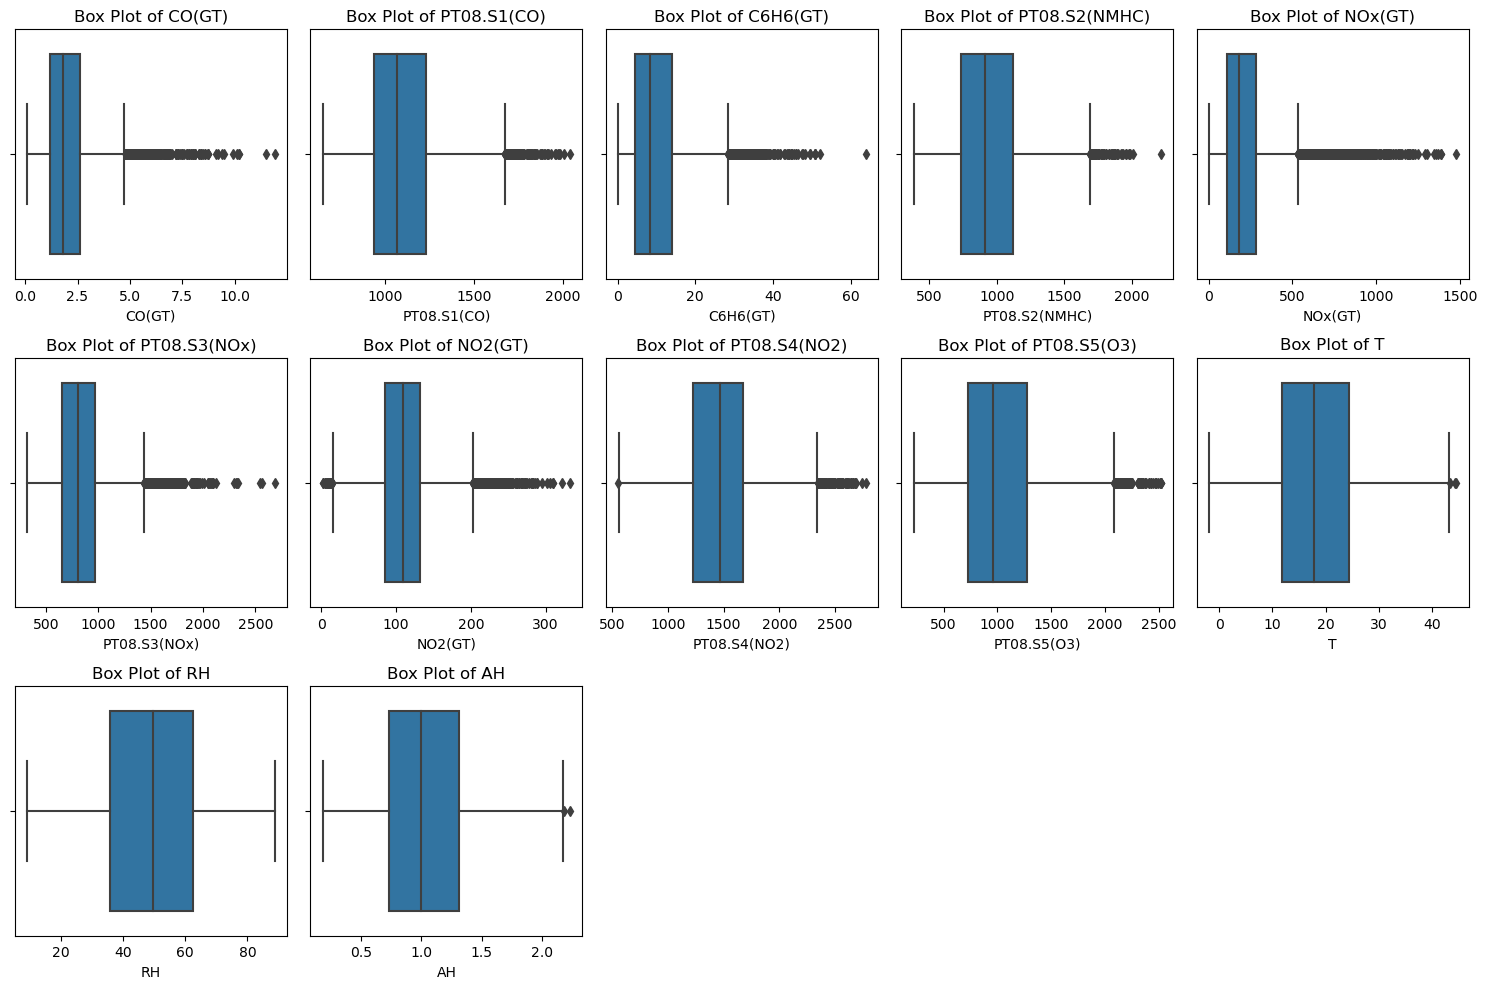

In [12]:
#Visualization method
# Select numerical columns for box plots
numerical_cols = df_new.select_dtypes(include=['number']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 5, i + 1)  
    sns.boxplot(x=df_new[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

In [13]:
#Quantitative Method
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Select numerical columns 
numerical_cols = df_new.select_dtypes(include=np.number).columns

outliers_iqr = {}
for col in numerical_cols:
    if col not in ['Date', 'Time']:  
        out = find_outliers_iqr(df_new, col)
        if not out.empty:
            outliers_iqr[col] = out

# Print the identified outliers using IQR
for col, outlier_df in outliers_iqr.items():
    print(f"Number of outliers in '{col}': {len(outlier_df)}\n")

Number of outliers in 'CO(GT)': 416

Number of outliers in 'PT08.S1(CO)': 117

Number of outliers in 'C6H6(GT)': 230

Number of outliers in 'PT08.S2(NMHC)': 64

Number of outliers in 'NOx(GT)': 732

Number of outliers in 'PT08.S3(NOx)': 241

Number of outliers in 'NO2(GT)': 343

Number of outliers in 'PT08.S4(NO2)': 97

Number of outliers in 'PT08.S5(O3)': 93

Number of outliers in 'T': 3

Number of outliers in 'AH': 2



In [14]:
#Reducing the outliers using log transformation
#Create a new copy of the data set.
df_transformed_all_log = df_new.copy() 
numerical_cols = df_transformed_all_log.select_dtypes(include=np.number).columns

cols_to_skip = ['Date', 'Time', 'T', 'AH', 'RH'] # Only skip non-numerical columns & No outliers columns

for col in numerical_cols:
    if col not in cols_to_skip:
        min_val = df_transformed_all_log[col].min()
        if min_val <= 0:
            epsilon = 1e-6
            df_transformed_all_log[col] = np.log(df_transformed_all_log[col] + epsilon)
            print(f"Log transformation applied to '{col}' after adding epsilon.")
        else:
            df_transformed_all_log[col] = np.log(df_transformed_all_log[col])
            print(f"Log transformation applied to '{col}'.")
    else:
        print(f"Skipping log transformation for column '{col}'.")
        
#proceed with outlier detection on this new dataset
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

outliers_iqr_all_log = {}
for col in numerical_cols:
    if col not in ['Date', 'Time']:
        out = find_outliers_iqr(df_transformed_all_log, col)
        if not out.empty:
            outliers_iqr_all_log[col] = out

print("\nNumber of outliers in the new log-transformed dataset (df_transformed_all_log) using IQR:")
for col, outlier_df in outliers_iqr_all_log.items():
    print(f"Number of outliers in '{col}' (IQR): {len(outlier_df)}")

Log transformation applied to 'CO(GT)'.
Log transformation applied to 'PT08.S1(CO)'.
Log transformation applied to 'C6H6(GT)'.
Log transformation applied to 'PT08.S2(NMHC)'.
Log transformation applied to 'NOx(GT)'.
Log transformation applied to 'PT08.S3(NOx)'.
Log transformation applied to 'NO2(GT)'.
Log transformation applied to 'PT08.S4(NO2)'.
Log transformation applied to 'PT08.S5(O3)'.
Skipping log transformation for column 'T'.
Skipping log transformation for column 'RH'.
Skipping log transformation for column 'AH'.

Number of outliers in the new log-transformed dataset (df_transformed_all_log) using IQR:
Number of outliers in 'CO(GT)' (IQR): 197
Number of outliers in 'PT08.S1(CO)' (IQR): 19
Number of outliers in 'C6H6(GT)' (IQR): 116
Number of outliers in 'PT08.S2(NMHC)' (IQR): 7
Number of outliers in 'NOx(GT)' (IQR): 237
Number of outliers in 'PT08.S3(NOx)' (IQR): 95
Number of outliers in 'NO2(GT)' (IQR): 433
Number of outliers in 'PT08.S4(NO2)' (IQR): 129
Number of outliers in 

#### 1.3 Aggregation

Data aggregation is a preprocessing task where the values of two or more objects are combined into a single object. The motivation for aggregation includes (1) reducing the size of data to be processed, (2) changing the granularity of analysis (from fine-scale to coarser-scale), and (3) improving the stability of the data.

~Impact to the Linear Regression.

Linear regression assumes that the error terms (the differences between the predicted and actual values) are independent. Multiple readings from the same day are likely to be correlated due to similar underlying conditions (weather, traffic patterns, etc.). This can lead to:
* Underestimation of Standard Errors: This can make statistical significance tests unreliable (e.g., p-values might be too small, leading to incorrect conclusions about the significance of predictors).
* Inflated R-squared: The model might appear to fit the data better than it actually does due to the temporal autocorrelation.

~Impact to the Decision Trees
* Potential for Overfitting: However, if the intraday variations are very noisy or specific to the training set, the tree-based models could potentially overfit to these details and not generalize well to unseen data.

In [15]:
#Change the DS name for easy reference
df_new1 = df_transformed_all_log.copy()

# Ensure 'Date' and 'Time' are strings
df_new1['Date'] = df_new1['Date'].astype(str)
df_new1['Time'] = df_new1['Time'].astype(str)

# Combine 'Date' and 'Time' into a single datetime column
df_new1['DateTime'] = pd.to_datetime(df_new1['Date'] + ' ' + df_new1['Time'])

# Fill missing values with the mean
df_new1 = df_new1.fillna(df_new1.mean())

# Drop the original 'Date' and 'Time' columns
df_new1 = df_new1.drop(['Date', 'Time'], axis=1)

# Set 'DateTime' as the index
df_new1 = df_new1.set_index('DateTime')

# Group by daily intervals and aggregate using the mean
df_daily = df_new1.groupby(pd.Grouper(freq='D')).mean()

# Display the first few rows of the new DataFrame 
print(df_daily.head())

df_daily.shape

              CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)   NOx(GT)  \
DateTime                                                               
2004-03-10  0.646316     7.181287  2.094262       6.810306  4.855540   
2004-03-11  0.576943     7.112740  1.711099       6.702223  4.696880   
2004-03-12  0.844524     7.132049  2.163524       6.867952  4.994460   
2004-03-13  0.903683     7.184842  2.265762       6.882105  5.116473   
2004-03-14  0.802608     7.204532  2.127154       6.830780  4.899366   

            PT08.S3(NOx)   NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)          T  \
DateTime                                                                   
2004-03-10      7.059506  4.684556      7.341252     6.994021  12.020833   
2004-03-11      7.116863  4.515607      7.309939     6.710936   9.833333   
2004-03-12      6.955888  4.695424      7.375435     6.899808  11.292708   
2004-03-13      6.884209  4.736941      7.368066     7.098663  12.866319   
2004-03-14      6.893538  4.672731     

(391, 12)

### 2. Explanatory Data Analysis

#### 2.1 Other factors versus Actual Humidity

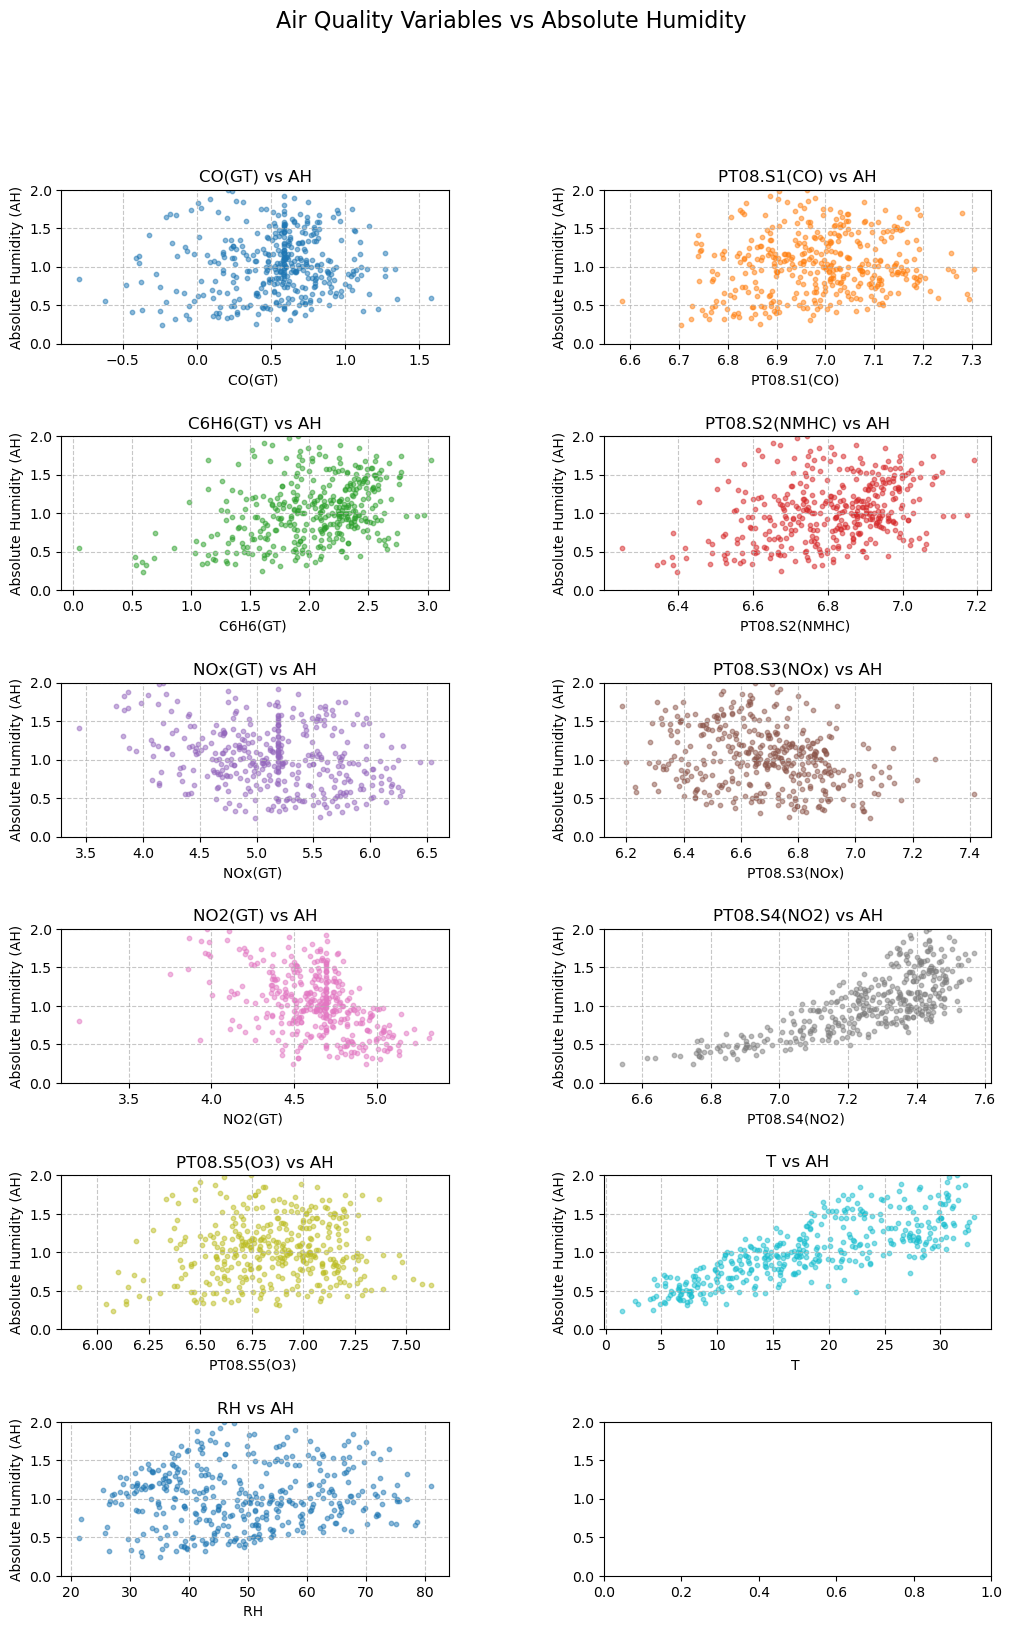

In [16]:
# Plot multiple lines in the same figure

#List of variables to plot against Absolute Humidity (AH)
variables = ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 
             'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 
             'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH']

num_plots = len(variables)
num_rows = 6
num_cols = 2
colors = plt.cm.tab10.colors  # Color palette

fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 18))
fig.suptitle('Air Quality Variables vs Absolute Humidity', fontsize=16)

for i, var in enumerate(variables):
    row = i // num_cols
    col = i % num_cols
    axs[row, col].scatter(df_daily[var], df_daily['AH'], 
                          s=10, alpha=0.5, color=colors[i % len(colors)])
    axs[row, col].set_xlabel(f'{var} ', fontsize=10)
    axs[row, col].set_ylabel('Absolute Humidity (AH)', fontsize=10)
    axs[row, col].set_title(f'{var} vs AH', fontsize=12)
    axs[row, col].grid(True, linestyle='--', alpha=0.7)

# Standardize y-axis range across all subplots
for ax in axs.flat:
    ax.set_ylim([0, 2])  

plt.subplots_adjust(wspace=0.4, hspace=0.6)  
plt.show()

#### 2.2 Types of ingredients of Air

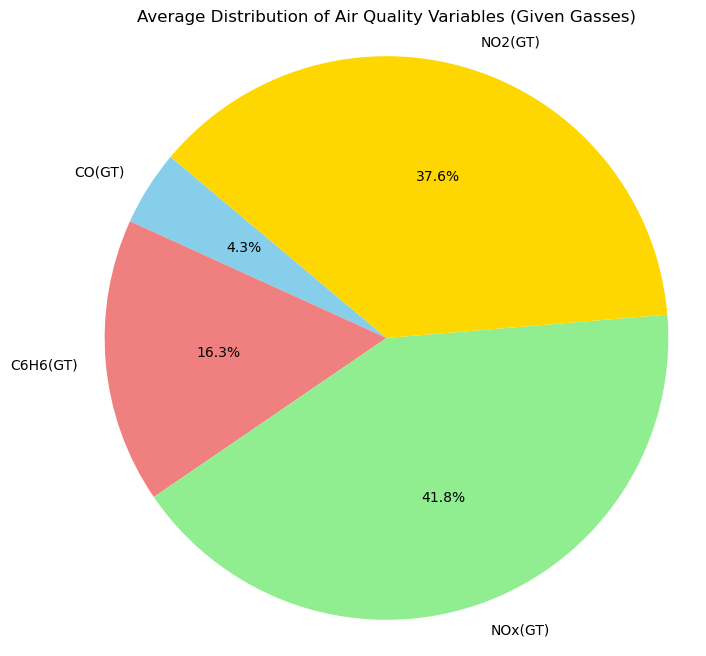

In [17]:
#Average Distribution of Air Quality Variables
# Calculate the average values
labels = ['CO(GT)', 'C6H6(GT)', 'NOx(GT)' , 'NO2(GT)']
avg_values = df_transformed_all_log[labels].mean()  # Calculate mean values for these columns
# Pie Chart
plt.figure(figsize=(8, 8))

# Plotting Pie Chart
plt.pie(
    avg_values,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=['skyblue', 'lightcoral', 'lightgreen', 'gold'],
)

# Adding Title
plt.title('Average Distribution of Air Quality Variables (Given Gasses)')

# Ensuring circle shape
plt.axis('equal')

# Showing plot
plt.show()

### 3 Linear Regression

In [18]:
#There was few null values occured after the previous operations.
df_daily.isnull().sum()

CO(GT)           8
PT08.S1(CO)      8
C6H6(GT)         8
PT08.S2(NMHC)    8
NOx(GT)          8
PT08.S3(NOx)     8
NO2(GT)          8
PT08.S4(NO2)     8
PT08.S5(O3)      8
T                8
RH               8
AH               8
dtype: int64

In [19]:
# Create a new DataFrame without the rows containing NaN in the specified columns
columns_to_check = ['CO(GT)', 'PT08.S1(CO)','C6H6(GT)','PT08.S2(NMHC)', 'NOx(GT)','PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']
df_new2 = df_daily.dropna(subset=columns_to_check, axis=0)

print("Original DataFrame shape:", df_daily.shape)
print("Cleaned DataFrame shape:", df_new2)

Original DataFrame shape: (391, 12)
Cleaned DataFrame shape:               CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)   NOx(GT)  \
DateTime                                                               
2004-03-10  0.646316     7.181287  2.094262       6.810306  4.855540   
2004-03-11  0.576943     7.112740  1.711099       6.702223  4.696880   
2004-03-12  0.844524     7.132049  2.163524       6.867952  4.994460   
2004-03-13  0.903683     7.184842  2.265762       6.882105  5.116473   
2004-03-14  0.802608     7.204532  2.127154       6.830780  4.899366   
...              ...          ...       ...            ...       ...   
2005-03-31  0.174489     6.908382  1.433562       6.596265  5.046793   
2005-04-01  0.041515     6.803581  1.039415       6.480928  4.924164   
2005-04-02 -0.206110     6.791254  0.854700       6.418287  4.902978   
2005-04-03  0.010601     6.883471  1.315327       6.557599  5.026764   
2005-04-04  0.435585     6.980320  1.651216       6.700298  5.241550   

  

In [20]:
#declaring feature vector and target variable
x = pd.DataFrame(df_new2, columns=['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)','PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)','NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH'])
y = df_new2['AH'].values.reshape(-1,1)

In [21]:
#Finding optimal train and test sets
test_sizes = [0.1, 0.15, 0.2, 0.25, 0.3]
results_df = pd.DataFrame(columns=['Test Size', 'MAE', 'MSE', 'RMSE', 'R2 Score'])

for test_size in test_sizes:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=0)
    regressor = LinearRegression()
    regressor.fit(x_train, y_train)
    y_pred = regressor.predict(x_test)
    
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2_score = metrics.r2_score(y_test, y_pred)
    results_df = results_df.append({
        'Test Size': test_size,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2 Score': r2_score
    }, ignore_index=True)
print(results_df)

   Test Size       MAE       MSE      RMSE  R2 Score
0       0.10  0.071465  0.008765  0.093623  0.943158
1       0.15  0.070048  0.008975  0.094736  0.942936
2       0.20  0.077856  0.010398  0.101969  0.938392
3       0.25  0.076131  0.009858  0.099287  0.938927
4       0.30  0.074953  0.009890  0.099447  0.939977


Based on above results, I would lean towards using a test size of 0.20. This offers a better balance between model training and evaluation robustness.

In [22]:
#Train and Test data set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print('x_train', x_train.shape)
print('x_test', x_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

x_train (306, 11)
x_test (77, 11)
y_train (306, 1)
y_test (77, 1)


#### 3.1 Applying Linear Regression

In [23]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [24]:
#Predict the test results
y_pred = regressor.predict(x_test)

In [25]:
#Check accuracy
print('Mean Absolute Error (Test): ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (Test): ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (Test): ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score (Test): ', metrics.r2_score(y_test, y_pred))

Mean Absolute Error (Test):  0.0778563478023607
Mean Squared Error (Test):  0.010397713978341359
Root Mean Squared Error (Test):  0.10196918151255976
R2 Score (Test):  0.9383920312334372


Mean Absolute Error (MAE): 0.07786

This represents the average absolute difference between the predicted and actual values, indicating the model's prediction error in the same units as the target variable.

Mean Squared Error (MSE): 0.01040

This is the average of the squared differences between predicted and actual values, penalizing larger errors more than MAE.

Root Mean Squared Error (RMSE): 0.10197

The square root of MSE, providing an error metric in the same units as the target variable, making it easier to interpret.

R2 Score: 0.93839

This indicates that approximately 93.84% of the variance in the target variable is explained by the model, signifying strong predictive performance.

Conclusion:
The model demonstrates high accuracy with low error values (MAE, MSE, RMSE) and a strong R2 score, suggesting it performs well on the test data.

In [28]:
#Predict on the training set
y_pred_train = regressor.predict(x_train)

print('Mean Absolute Error (Train):', metrics.mean_absolute_error(y_train, y_pred_train))
print('Mean Squared Error (Train):', metrics.mean_squared_error(y_train, y_pred_train))
print('R2 Score (Train):', metrics.r2_score(y_train, y_pred_train))

Mean Absolute Error (Train): 0.07299474772316795
Mean Squared Error (Train): 0.008708274199311182
R2 Score (Train): 0.9404963481805948


#### 3.2 Visualize Residuals

Analyzing the residuals (the differences between the actual and predicted values) can provide insights into the model's errors and whether the assumptions of linear regression are being met.

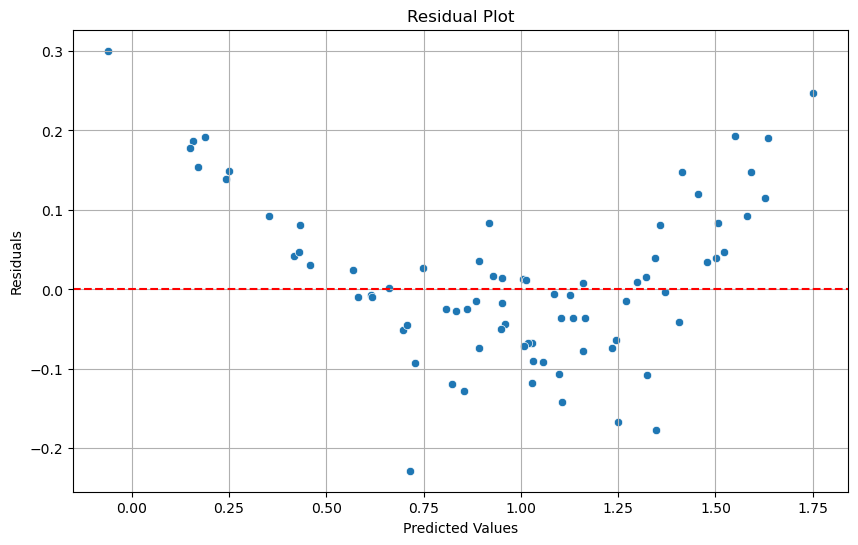

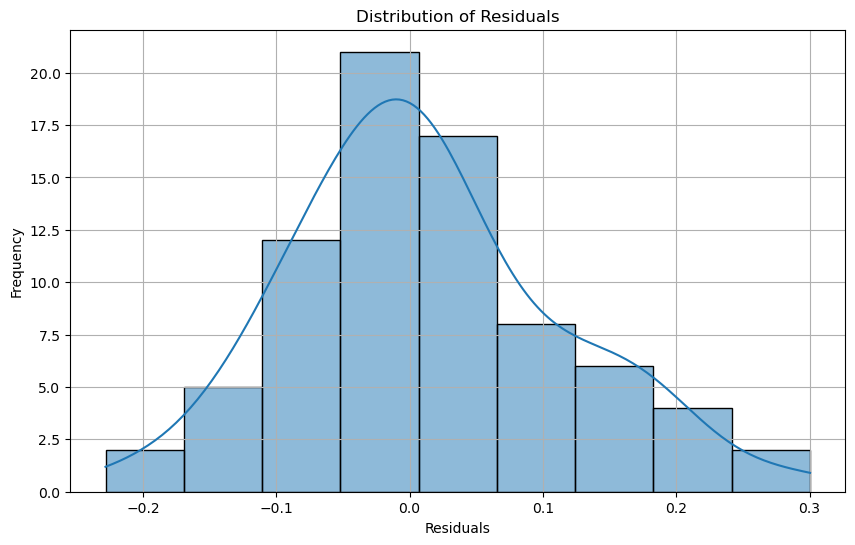

In [29]:
# Asignning summation for resudals
residuals = y_test - y_pred

# Flatten y_pred and residuals to 1D
y_pred_flat = y_pred.flatten()
residuals_flat = residuals.flatten()

# Create a DataFrame for the residual plot
residuals_df = pd.DataFrame({'Predicted Values': y_pred_flat, 'Residuals': residuals_flat})

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Predicted Values', y='Residuals', data=residuals_df)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

# For the distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals_flat, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.grid(True)
plt.show()

The residual plot shows a non-random pattern, indicating that the linear regression model may not be a good fit for the data. Specifically, the residuals appear to be positive at both low and high predicted values, while being negative in the middle range, suggesting non-linearity.

#### 3.3 Learning curves

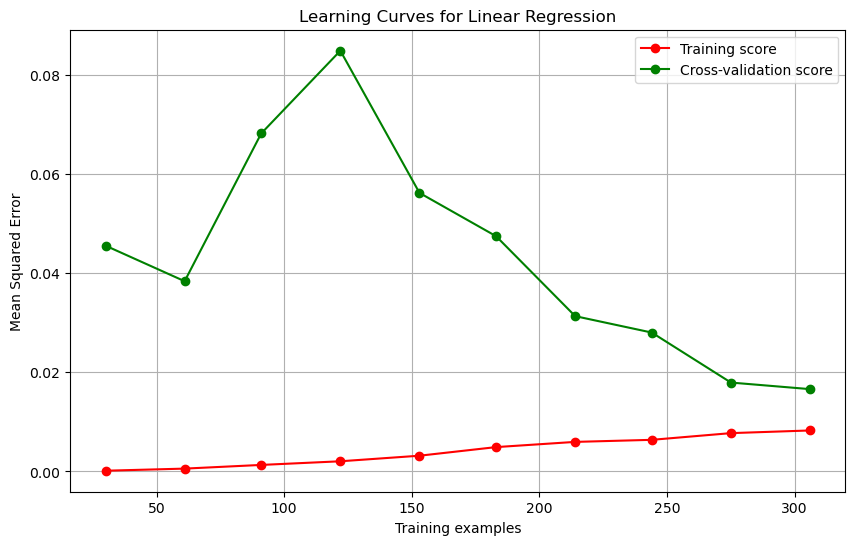

In [30]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    regressor, x, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='neg_mean_squared_error'
)

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curves for Linear Regression")
plt.legend(loc="best")
plt.grid(True)
plt.show()

The learning curve indicates that the linear regression model is underfitting the data. The training score is low and the cross-validation score is even lower, with a considerable gap between them. This suggests that the model is not capturing the underlying patterns in the data effectively, even with increasing training examples. More complex models or feature engineering may improve performance.

#### 3.4 Feature Importance

In [31]:
print("\nCoefficients of the Linear Regression Model:")
if regressor.coef_.ndim == 2 and regressor.coef_.shape[0] == 1:
    coefficients = regressor.coef_[0]  
    for i, coef in enumerate(coefficients):
        if i < len(x_train.columns):
            print(f"{x_train.columns[i]}: {coef}")
        else:
            print(f"Coefficient {i+1}: {coef} (Feature name not found)")
else:
    print("Unexpected shape of regressor.coef_:", regressor.coef_.shape)

print("\nIntercept of the Linear Regression Model:")
print(regressor.intercept_)


Coefficients of the Linear Regression Model:
CO(GT): 0.05789338335366462
PT08.S1(CO): -0.061148294252170735
C6H6(GT): -0.21431333766963678
PT08.S2(NMHC): 0.3669803675014181
NOx(GT): -0.0042586619003392055
PT08.S3(NOx): -0.28373976249249394
NO2(GT): -0.13440035435483666
PT08.S4(NO2): -0.027275382979754872
PT08.S5(O3): -0.008555428061316796
T: 0.053327985085516484
RH: 0.017699426557034634

Intercept of the Linear Regression Model:
[0.30271577]


### 4. Decision Trees


We will use same test and train sets for the decision tree model implementing steps.

In [32]:
# Initialize and train the Decision Tree Regressor
tree_regressor = DecisionTreeRegressor(random_state=0) # Use a random_state for reproducibility
tree_regressor.fit(x_train, y_train)

# Make predictions on the test set
y_pred_tree = tree_regressor.predict(x_test)

# Evaluate the Decision Tree Regressor
mae_tree = metrics.mean_absolute_error(y_test, y_pred_tree)
mse_tree = metrics.mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
r2_score_tree = metrics.r2_score(y_test, y_pred_tree)

print("--- Decision Tree Regressor Performance ---")
print(f"Mean Absolute Error (Test): {mae_tree}")
print(f"Mean Squared Error (Test): {mse_tree}")
print(f"Root Mean Squared Error (Test): {rmse_tree}")
print(f"R2 Score (Test): {r2_score_tree}")

--- Decision Tree Regressor Performance ---
Mean Absolute Error (Test): 0.11461748219622588
Mean Squared Error (Test): 0.025125047280806598
Root Mean Squared Error (Test): 0.15850882398405017
R2 Score (Test): 0.8511304377713543


The Decision Tree Regressor shows a reasonable fit with an R2 Score of 0.851. However, it has a Mean Absolute Error of 0.115 and a Root Mean Squared Error of 0.159, indicating some level of prediction error on the test data.

#### 4.1 Performance of the model on Train data

In [33]:
# Make predictions on the training data
y_pred_train_tree = tree_regressor.predict(x_train)

# Evaluate the model on the training data
mae_train_tree = metrics.mean_absolute_error(y_train, y_pred_train_tree)
mse_train_tree = metrics.mean_squared_error(y_train, y_pred_train_tree)
rmse_train_tree = np.sqrt(mse_train_tree)
r2_score_train_tree = metrics.r2_score(y_train, y_pred_train_tree)

print("\n--- Decision Tree Regressor Performance on Training Data ---")
print(f"Mean Absolute Error (Train): {mae_train_tree}")
print(f"Mean Squared Error (Train): {mse_train_tree}")
print(f"Root Mean Squared Error (Train): {rmse_train_tree}")
print(f"R2 Score (Train): {r2_score_train_tree}")


--- Decision Tree Regressor Performance on Training Data ---
Mean Absolute Error (Train): 0.0
Mean Squared Error (Train): 0.0
Root Mean Squared Error (Train): 0.0
R2 Score (Train): 1.0


The output shows perfect performance on the training data (MAE=0.0, MSE=0.0, RMSE=0.0, R2=1.0), which is a common characteristic of decision trees trained without constraints, as they can perfectly memorize the training data. This often indicates a risk of overfitting and the model's performance on unseen data (test data) would likely be significantly worse.

#### 4.2 Feature Importance

In [34]:
if hasattr(tree_regressor, 'feature_importances_'):
    feature_importance = pd.DataFrame({'Feature': x_train.columns, 'Importance': tree_regressor.feature_importances_})
    feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
    print("\nFeature Importance:\n", feature_importance)
else:
    print("The trained model does not have 'feature_importances_' attribute.")


Feature Importance:
           Feature  Importance
9               T    0.633822
7    PT08.S4(NO2)    0.123423
10             RH    0.116359
5    PT08.S3(NOx)    0.083663
3   PT08.S2(NMHC)    0.016954
6         NO2(GT)    0.007588
2        C6H6(GT)    0.006362
1     PT08.S1(CO)    0.005052
0          CO(GT)    0.002780
4         NOx(GT)    0.002471
8     PT08.S5(O3)    0.001526


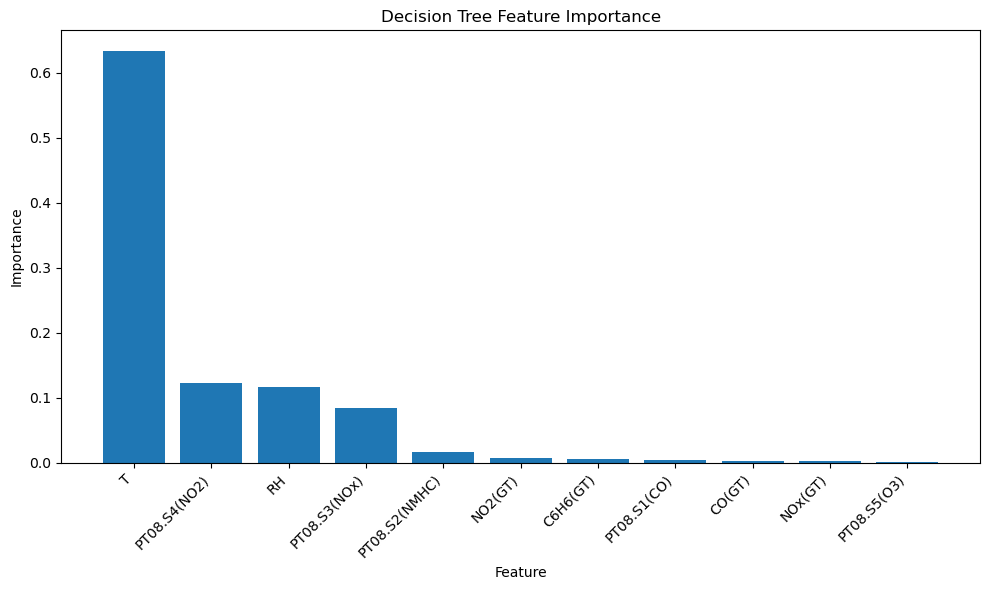

In [35]:
#Visualizing the feature importance
if hasattr(tree_regressor, 'feature_importances_'):
    feature_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': tree_regressor.feature_importances_})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.title('Decision Tree Feature Importance')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

#### 4.3 Finding optimal decision tree results

In [37]:
#Define the parameter
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],  # Try no limit and some specific depths
    'min_samples_split': [2, 5, 10],     # Minimum samples to split an internal node
    'min_samples_leaf': [1, 3, 5],       # Minimum samples required at a leaf node
    'max_features': ['sqrt', 'log2', None] # Number of features to consider for the best split
}
#Initiate the gridsearch
grid_search = GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1) # Use all available cores for faster tuning

#Fit the gridsearch for trainning data
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

In [38]:
#After fitting, finding the cross validation results
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Hyperparameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 2}
Best Cross-Validation Score: -0.018396224500683407


In [39]:
#Evaluate the best model in test data
best_tree = grid_search.best_estimator_
y_pred_best_tree = best_tree.predict(x_test)

mae_best_tree = metrics.mean_absolute_error(y_test, y_pred_best_tree)
mse_best_tree = metrics.mean_squared_error(y_test, y_pred_best_tree)
rmse_best_tree = metrics.mean_squared_error(y_test, y_pred_best_tree, squared=False)
r2_best_tree = metrics.r2_score(y_test, y_pred_best_tree)

print("\n--- Performance of the Best Model on the Test Set ---")
print(f"Mean Absolute Error (Test): {mae_best_tree:.4f}")
print(f"Mean Squared Error (Test): {mse_best_tree:.4f}")
print(f"Root Mean Squared Error (Test): {rmse_best_tree:.4f}")
print(f"R2 Score (Test): {r2_best_tree:.4f}")


--- Performance of the Best Model on the Test Set ---
Mean Absolute Error (Test): 0.1094
Mean Squared Error (Test): 0.0219
Root Mean Squared Error (Test): 0.1478
R2 Score (Test): 0.8705


~Initial Decision Tree Model:
* The initial Decision Tree Regressor model achieved an R2 Score of 0.851 on the test set, with a Mean Absolute Error (MAE) of 0.114, a Mean Squared Error (MSE) of 0.025, and a Root Mean Squared Error (RMSE) of 0.159.

~ Optimized Decision Tree Model:
* After hyperparameter tuning, the best model's performance improved with an R2 Score of 0.871.The MAE reduced to 0.109, MSE decreased to 0.022, and RMSE improved to 0.148.

~ Conclusion:
* The optimized Decision Tree Regressor exhibits enhanced performance compared to the initial model across all measured metrics, indicating better predictive capabilities on the test data. The R2 score increased and the error metrics decreased, demonstrating more accurate predictions.

#### 4.4 Residual Distribution

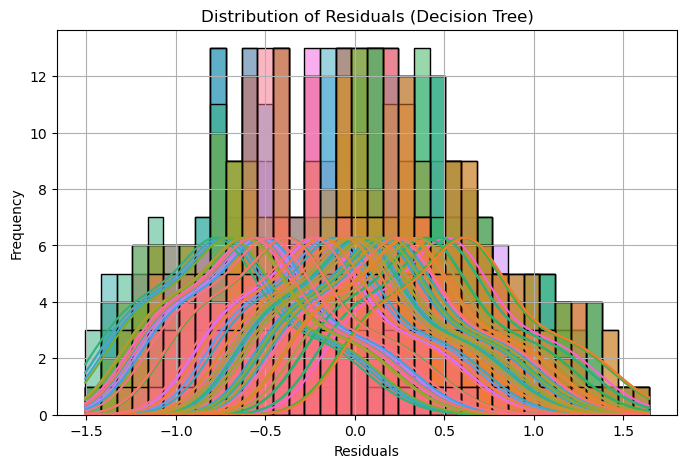

In [40]:
#visualizing
residuals = y_test - y_pred_tree
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, color='skyblue', legend=False)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals (Decision Tree)')
plt.grid(True)
plt.show()

END